In [1002]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1003]:
people = pd.read_csv('data_all_teams.csv')


In [1004]:
people.head()

,year,sex,profession,income,age,net_worth
0,0,F,civil servant,5131.08,40,10000.0
1,0,M,child,0.00,1,10000.0
2,0,M,unemployed,124.10,25,10000.0
3,0,M,farmer,1868.39,36,10000.0
4,0,F,child,0.00,1,10000.0


In [1005]:
gdp = pd.read_csv('data_all_teams_gdp.csv')

In [1006]:
gdp

,year,gdp
0,0,947610.99
1,1,931427.95
2,2,872704.64
3,3,875281.14
4,4,853371.77
...,...,...
96,96,1226092.63
97,97,1202731.04
98,98,1196294.53
99,99,1216246.99


# GDP by years

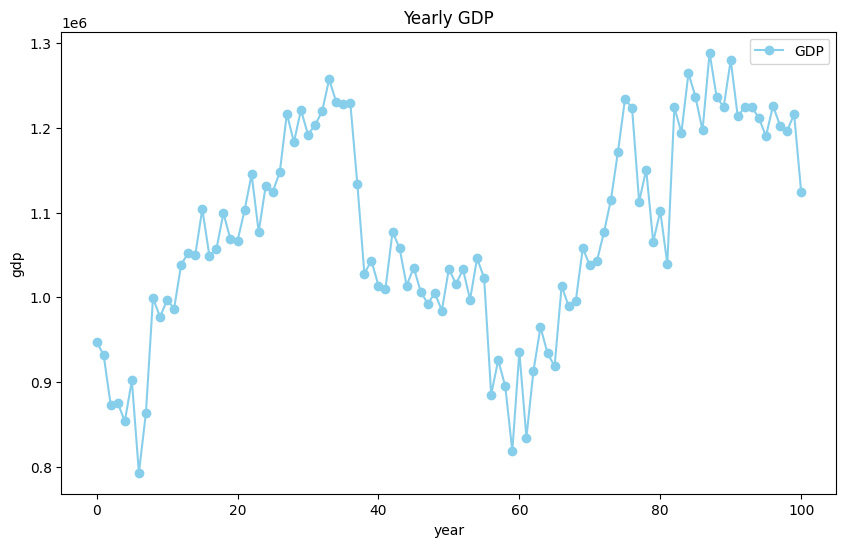

In [1007]:
plt.figure(figsize=(10, 6))
plt.plot(gdp['year'], gdp['gdp'], marker='o', linestyle='-', color='skyblue', label='GDP')
plt.xlabel("year")
plt.ylabel("gdp")
plt.title("Yearly GDP")
plt.legend()
plt.show()

# Demographic

In [1008]:
# Count occurrences of each category
job = people["profession"].value_counts()

print(job)

profession
child               12166
farmer               6532
fisher               6249
homemaker            5930
craftsman            5377
retired              4822
service provider     3933
civil servant        3498
unemployed           2443
Name: count, dtype: int64


In [1009]:
# Count occurrences of each category
sex = people["sex"].value_counts()


In [1010]:
# Print summary
print(sex)

sex
F    25018
M    23715
X     2217
Name: count, dtype: int64


<Axes: xlabel='year'>

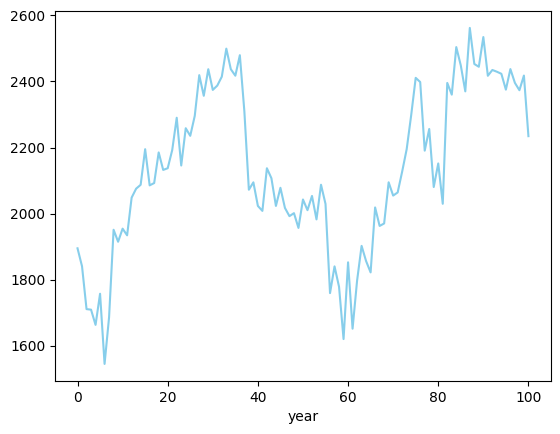

In [1011]:
# Group by Year and calculate the average income
yearly_income = people.groupby('year')["income"].mean()

yearly_income.plot(kind='line', color='skyblue')

# Processing Data 

In [1012]:
people['yearly_income'] = people.groupby('year')['income'].mean()

In [1013]:
people['yearly_net_worth'] = people.groupby('year')['net_worth'].mean()

In [1014]:
people['yearly_age'] = people.groupby('year')['age'].mean()

In [1015]:
people = pd.get_dummies(people, columns=['sex','profession'])

In [1016]:
people[['sex_F','sex_M','sex_X','profession_child','profession_civil servant','profession_craftsman','profession_farmer','profession_fisher','profession_homemaker','profession_retired','profession_service provider','profession_unemployed']] = people[['sex_F','sex_M','sex_X','profession_child','profession_civil servant','profession_craftsman','profession_farmer','profession_fisher','profession_homemaker','profession_retired','profession_service provider','profession_unemployed']].astype(int)

In [1017]:
people['yearly_F'] = people.groupby('year')['sex_F'].sum()
people['yearly_M'] = people.groupby('year')['sex_M'].sum()
people['yearly_X'] = people.groupby('year')['sex_X'].sum()
people['yearly_child'] = people.groupby('year')['profession_child'].sum()
people['yearly_civil servant'] = people.groupby('year')['profession_civil servant'].sum()
people['yearly_craftsman'] = people.groupby('year')['profession_craftsman'].sum()
people['yearly_farmer'] = people.groupby('year')['profession_farmer'].sum()
people['yearly_fisher'] = people.groupby('year')['profession_fisher'].sum()
people['yearly_homemaker'] = people.groupby('year')['profession_homemaker'].sum()
people['yearly_retired'] = people.groupby('year')['profession_retired'].sum()
people['yearly_service provider'] = people.groupby('year')['profession_service provider'].sum()
people['yearly_unemployed'] = people.groupby('year')['profession_unemployed'].sum()

In [1018]:
column_todrop = ['year','income','age','net_worth','sex_F','sex_M','sex_X','profession_child','profession_civil servant','profession_craftsman', 'profession_farmer','profession_fisher','profession_homemaker','profession_retired','profession_service provider','profession_unemployed']
# Drop unwanted columns before grouping
people = people.drop(columns=column_todrop)
people = people.dropna()
# people.insert(0, "year", np.linspace(0, 100, len(people)))

gdp = gdp.drop(columns=['year'])



In [1019]:
column_todrop = people.columns.tolist()
year_to_shift = 5
# Select the last 5 rows of the DataFrame
last_five_rows = people.tail(year_to_shift)
# Rename specific columns
last_five_rows = last_five_rows.rename(columns={
    'yearly_F': 'lagged_yearly_F', 
    'yearly_M': 'lagged_yearly_M',
    'yearly_X': 'lagged_yearly_X',         
    'yearly_child': 'lagged_yearly_child',
    'yearly_civil servant': 'lagged_yearly_civil servant',
    'yearly_craftsman': 'lagged_yearly_craftsman',
    'yearly_farmer': 'lagged_yearly_farmer',
    'yearly_fisher': 'lagged_yearly_fisher',
    'yearly_homemaker': 'lagged_yearly_homemaker',
    'yearly_retired': 'lagged_yearly_retired',
    'yearly_service provider': 'lagged_yearly_service provider',
    'yearly_unemployed': 'lagged_yearly_unemployed',
    'yearly_income': 'lagged_yearly_income',
    'yearly_net_worth': 'lagged_yearly_net_worth',
    'yearly_age': 'lagged_yearly_age'
                        })



# Create lag features for time series prediction
people['lagged_yearly_F'] = people['yearly_F'].shift(year_to_shift)
people['lagged_yearly_M'] = people['yearly_M'].shift(year_to_shift)
people['lagged_yearly_X'] = people['yearly_X'].shift(year_to_shift)
people['lagged_yearly_child'] = people['yearly_child'].shift(year_to_shift)
people['lagged_yearly_civil servant'] = people['yearly_civil servant'].shift(year_to_shift)
people['lagged_yearly_craftsman'] = people['yearly_craftsman'].shift(year_to_shift)
people['lagged_yearly_farmer'] = people['yearly_farmer'].shift(year_to_shift)
people['lagged_yearly_fisher'] = people['yearly_fisher'].shift(year_to_shift)
people['lagged_yearly_homemaker'] = people['yearly_homemaker'].shift(year_to_shift)
people['lagged_yearly_retired'] = people['yearly_retired'].shift(year_to_shift)
people['lagged_yearly_service provider'] = people['yearly_service provider'].shift(year_to_shift)
people['lagged_yearly_unemployed'] = people['yearly_unemployed'].shift(year_to_shift)
people['lagged_yearly_income'] = people['yearly_income'].shift(year_to_shift)
people['lagged_yearly_net_worth'] = people['yearly_net_worth'].shift(year_to_shift)
people['lagged_yearly_age'] = people['yearly_age'].shift(year_to_shift)
people['gdp'] = gdp['gdp']
people = people.drop(columns=column_todrop)
# Drop rows with missing values after shifting
people = people.dropna()

# Update features and target
X = people.loc[:, ~people.columns.str.contains('gdp')]
y = people['gdp']


In [1020]:
print(X)

     lagged_yearly_F  lagged_yearly_M  lagged_yearly_X  lagged_yearly_child  \
5              234.0            244.0             22.0                124.0   
6              237.0            247.0             22.0                121.0   
7              239.0            248.0             23.0                118.0   
8              239.0            250.0             23.0                113.0   
9              241.0            249.0             23.0                110.0   
..               ...              ...              ...                  ...   
96             242.0            238.0             22.0                 96.0   
97             242.0            239.0             22.0                 99.0   
98             241.0            241.0             22.0                103.0   
99             239.0            239.0             22.0                108.0   
100            241.0            238.0             22.0                112.0   

     lagged_yearly_civil servant  lagged_yearly_cra

In [1021]:
print(y)

5       901704.41
6       792759.29
7       863732.70
8       999082.05
9       976661.01
          ...    
96     1226092.63
97     1202731.04
98     1196294.53
99     1216246.99
100    1123997.05
Name: gdp, Length: 96, dtype: float64


# Machine learning with XGboost

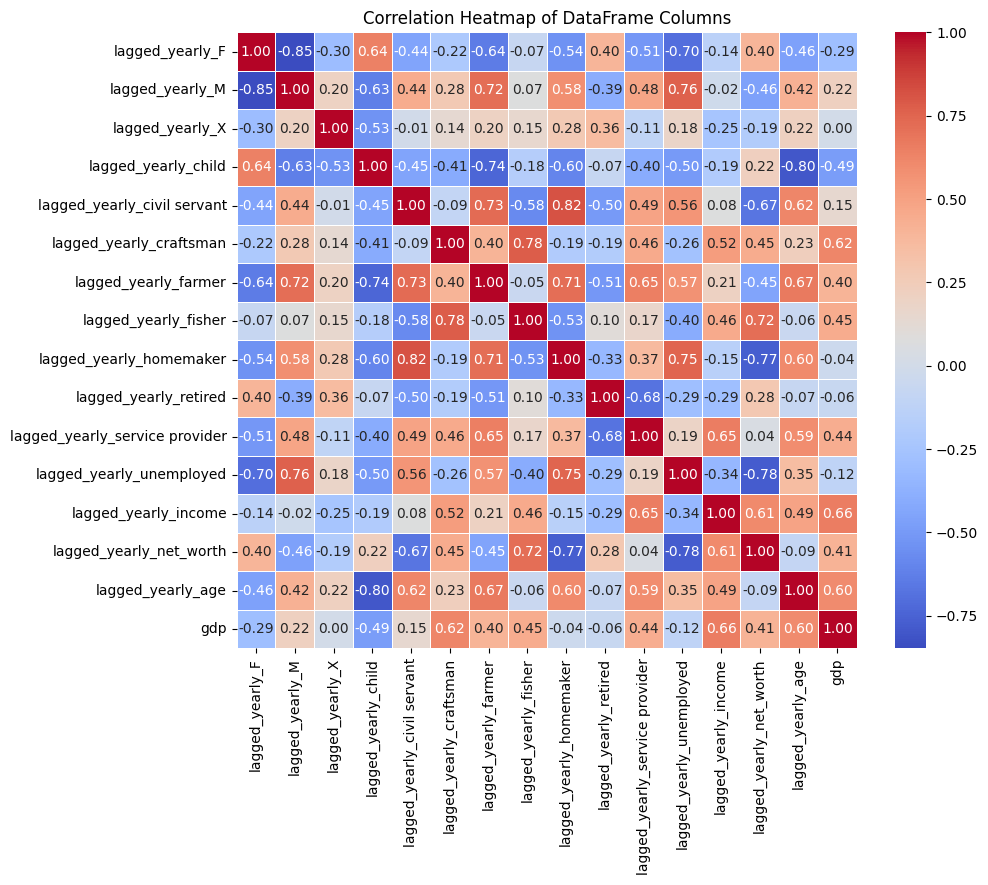

In [1022]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the correlation matrix
correlation_matrix = people.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of DataFrame Columns")
plt.show()


In [1023]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1024]:
import xgboost as xgb

# Define the model with linear booster
model = xgb.XGBRegressor(
    booster='gblinear',  # Use linear booster
    objective='reg:squarederror',  # Regression task
    learning_rate=0.1,  # Learning rate
    reg_lambda=1,       # L2 regularization
    reg_alpha=0,        # L1 regularization
    n_estimators=100    # Number of rounds
)

# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1025]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

MSE: 10736130928.0553, R²: 0.2247


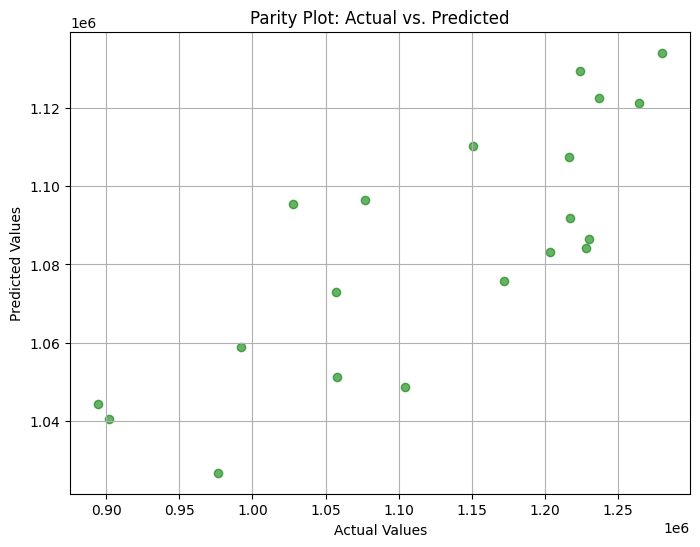

In [1026]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot: Actual vs. Predicted')
plt.grid(True)
plt.show()

In [1027]:
X

,lagged_yearly_F,lagged_yearly_M,lagged_yearly_X,lagged_yearly_child,lagged_yearly_civil servant,lagged_yearly_craftsman,lagged_yearly_farmer,lagged_yearly_fisher,lagged_yearly_homemaker,lagged_yearly_retired,lagged_yearly_service provider,lagged_yearly_unemployed,lagged_yearly_income,lagged_yearly_net_worth,lagged_yearly_age
5,234.0,244.0,22.0,124.0,43.0,48.0,73.0,53.0,74.0,0.0,41.0,44.0,1895.221980,10000.000000,33.516000
6,237.0,247.0,22.0,121.0,41.0,48.0,75.0,52.0,75.0,9.0,41.0,44.0,1840.766700,10666.924664,34.106719
7,239.0,248.0,23.0,118.0,42.0,49.0,74.0,50.0,74.0,19.0,39.0,45.0,1711.185569,11279.017549,34.831373
8,239.0,250.0,23.0,113.0,41.0,50.0,74.0,48.0,76.0,27.0,39.0,44.0,1709.533477,11884.268535,35.560547
9,241.0,249.0,23.0,110.0,41.0,48.0,73.0,46.0,75.0,37.0,40.0,43.0,1663.492729,12450.341267,36.230019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,242.0,238.0,22.0,96.0,32.0,58.0,67.0,72.0,57.0,53.0,41.0,26.0,2417.281952,29616.875159,38.195219
97,242.0,239.0,22.0,99.0,33.0,57.0,65.0,73.0,54.0,55.0,40.0,27.0,2434.873996,29645.192227,38.276342
98,241.0,241.0,22.0,103.0,34.0,56.0,63.0,73.0,50.0,57.0,41.0,27.0,2429.562103,29347.659802,38.323413
99,239.0,239.0,22.0,108.0,32.0,56.0,62.0,72.0,50.0,52.0,40.0,28.0,2423.274660,29238.914740,37.794000


In [1028]:
last_five_rows = last_five_rows[X.columns]
print(last_five_rows)

     lagged_yearly_F  lagged_yearly_M  lagged_yearly_X  lagged_yearly_child  \
96             241.0            240.0             22.0                115.0   
97             244.0            237.0             21.0                120.0   
98             248.0            235.0             21.0                124.0   
99             246.0            237.0             20.0                128.0   
100            244.0            239.0             20.0                131.0   

     lagged_yearly_civil servant  lagged_yearly_craftsman  \
96                          32.0                     55.0   
97                          32.0                     54.0   
98                          31.0                     52.0   
99                          30.0                     51.0   
100                         30.0                     51.0   

     lagged_yearly_farmer  lagged_yearly_fisher  lagged_yearly_homemaker  \
96                   60.0                  69.0                     51.0   
97    

In [1029]:
next_five_gdp = model.predict(last_five_rows)
print(next_five_gdp)

[1095959.6 1092011.2 1086428.4 1083317.8 1073587.1]
